In [2]:
import pandas as pd                         
import matplotlib.pyplot as plt             
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression      
from sklearn.metrics import mean_squared_error, r2_score 


In [3]:
data = {
    'Date': [
        '2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04', '2024-01-05',
        '2024-01-06', '2024-01-07', '2024-01-08', '2024-01-09', '2024-01-10'
    ],
    'Open': [150.00, 151.50, 152.00, 153.00, 154.50, 155.00, 156.00, 157.00, 158.50, 159.00],
    'High': [152.00, 153.00, 154.00, 155.00, 156.00, 157.00, 158.00, 159.00, 160.00, 161.00],
    'Low':  [149.00, 150.00, 151.00, 152.00, 153.00, 154.00, 155.00, 156.00, 157.00, 158.00],
    'Close': [151.00, 152.50, 153.00, 154.00, 155.00, 156.00, 157.00, 158.00, 159.00, 160.00],
    'Volume': [1000000, 1100000, 1050000, 1200000, 1300000, 1250000, 1350000, 1400000, 1450000, 1500000]
}

df = pd.DataFrame(data)
df

,Date,Open,High,Low,Close,Volume
0,2024-01-01,150.0,152.0,149.0,151.0,1000000
1,2024-01-02,151.5,153.0,150.0,152.5,1100000
2,2024-01-03,152.0,154.0,151.0,153.0,1050000
3,2024-01-04,153.0,155.0,152.0,154.0,1200000
4,2024-01-05,154.5,156.0,153.0,155.0,1300000
5,2024-01-06,155.0,157.0,154.0,156.0,1250000
6,2024-01-07,156.0,158.0,155.0,157.0,1350000
7,2024-01-08,157.0,159.0,156.0,158.0,1400000
8,2024-01-09,158.5,160.0,157.0,159.0,1450000
9,2024-01-10,159.0,161.0,158.0,160.0,1500000


In [4]:
df['Date'] = pd.to_datetime(df['Date']) 
df = df.sort_values('Date')             
df['Days'] = (df['Date'] - df['Date'].min()).dt.days  
df


,Date,Open,High,Low,Close,Volume,Days
0,2024-01-01,150.0,152.0,149.0,151.0,1000000,0
1,2024-01-02,151.5,153.0,150.0,152.5,1100000,1
2,2024-01-03,152.0,154.0,151.0,153.0,1050000,2
3,2024-01-04,153.0,155.0,152.0,154.0,1200000,3
4,2024-01-05,154.5,156.0,153.0,155.0,1300000,4
5,2024-01-06,155.0,157.0,154.0,156.0,1250000,5
6,2024-01-07,156.0,158.0,155.0,157.0,1350000,6
7,2024-01-08,157.0,159.0,156.0,158.0,1400000,7
8,2024-01-09,158.5,160.0,157.0,159.0,1450000,8
9,2024-01-10,159.0,161.0,158.0,160.0,1500000,9


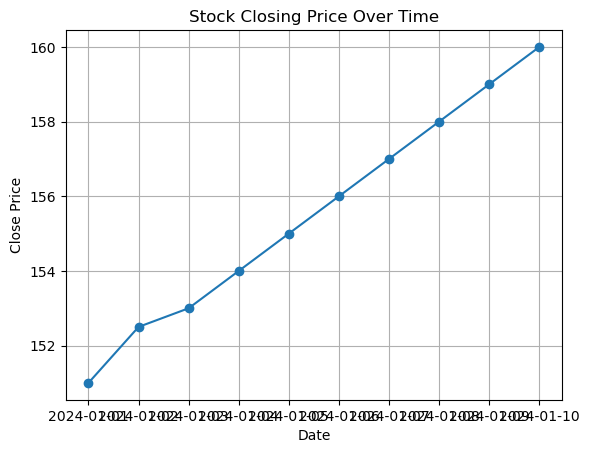

In [5]:
plt.plot(df['Date'], df['Close'], marker='o')
plt.title("Stock Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.grid(True)
plt.show()


In [7]:
X = df[['Days']]   
y = df['Close']   


In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)


In [9]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [10]:
y_pred = model.predict(X_test)


print("R² Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))


R² Score: 0.9990670566093455
Mean Squared Error: 0.008396490515890623


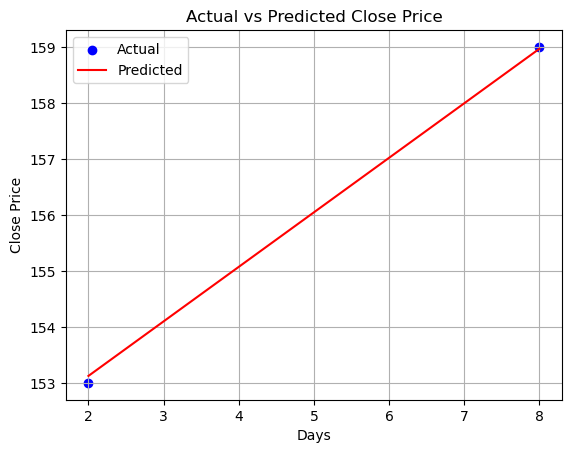

In [11]:
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.xlabel("Days")
plt.ylabel("Close Price")
plt.title("Actual vs Predicted Close Price")
plt.legend()
plt.grid(True)
plt.show()


In [15]:

future_price = model.predict(pd.DataFrame({'Days':[future_day]}))

print(f"Predicted stock price after 5 more days: ${future_price[0]:.2f}")


Predicted stock price after 5 more days: $164.81
